# Political Violence Targeting Women & Demonstrations Featuring Women

#### All violence targeting women, as well as demonstrations featuring women, are included in the data file below. The data in this file cover all events in which women were specifically targeted by political violence, not all events involving women in any way; the file also covers all demonstration events in which women were specifically featured, not all demonstrations involving women. 

#### This dataset was extract from ACLED Access Portal and we perform EDA using Python.


### Data Collection & Data Exploration

We import pandas and necessary libraries for dataframe manipulation and analysis.

In [1]:
# Libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset is downloaded
df_gpv = pd.read_csv("gender_Sep27-1.csv")
display(df_gpv.shape)

(75563, 31)

In [3]:
# First rows are checked
first_rows = df_gpv.head()

display(first_rows)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,BRA85924,2024-09-27,2024,1,Political violence,Violence against civilians,Sexual violence,Unidentified Gang (Brazil),NaN,Political militia,...,Sorriso,-12.5453,-55.7114,1,Gazeta Digital,Subnational,"On 27 September 2024, in Sorriso (Mato Grosso)...",0,NaN,1727730463
1,ECU3988,2024-09-27,2024,2,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Ecuador),NaN,Political militia,...,Guayaquil,-2.1962,-79.8862,1,Ecuavisa; El Universo (Ecuador),National,"Around 27 September 2024 (as reported), in Gua...",1,women targeted: government officials,1727730464
2,MEX93498,2024-09-27,2024,2,Political violence,Violence against civilians,Abduction/forced disappearance,Unidentified Gang (Mexico),NaN,Political militia,...,Tijuana,32.5325,-117.0190,1,AFN - Tijuana,Subnational,"Around 27 September 2024 (as reported), in Tij...",0,NaN,1727730464
3,MEX93502,2024-09-27,2024,1,Political violence,Violence against civilians,Attack,Unidentified Gang (Mexico),NaN,Political militia,...,Ciudad de Mexico - Gustavo A. Madero,19.4829,-99.1135,1,Milenio,National,"On 27 September 2024, in Ciudad de Mexico - Gu...",1,NaN,1727730464
4,YEM92022,2024-09-27,2024,1,Political violence,Violence against civilians,Attack,Police Forces of Yemen (2017-) Houthi,Teachers (Yemen),State forces,...,Al Yahari,13.9966,44.0604,1,Khabar News Agency (Yemen),National,"On 27 September 2024, a Houthi-affiliated fema...",0,NaN,1727730471


In [4]:
# Last five rows are checking

last_rows = df_gpv.tail()

display(last_rows)


,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
75558,UGA13,1997-03-05,1997,2,Political violence,Violence against civilians,Attack,LRA: Lords Resistance Army,NaN,Rebel group,...,Palabek,3.4333,32.5667,1,New York Times,International,After failing to find deserters they captured ...,9,women targeted: girls,1667868656
75559,ALG50,1997-02-24,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,Rebel group,...,Berrouaghia,36.1352,2.9109,1,Algeria Watch,Other,24 March: 5 young girls were killed in Berroua...,5,women targeted: girls,1638981224
75560,SIE4762,1997-01-22,1997,2,Political violence,Violence against civilians,Sexual violence,RUF: Revolutionary United Front,NaN,Rebel group,...,Magburaka,8.7167,-11.9500,2,AFP,International,Week of 22 January. RUF forces attacked civili...,40,women targeted: girls,1638981224
75561,RWA652,1997-01-15,1997,3,Political violence,Violence against civilians,Attack,Unidentified Armed Group (Rwanda),NaN,Political militia,...,Ruhengeri,-1.4998,29.6350,1,Aid Worker Security Database,Local partner-Other,"Around 15 January 1997 (month of), 3 spanish a...",3,NaN,1633983690
75562,NIR1,1997-01-06,1997,1,Political violence,Violence against civilians,Attack,Tuareg Ethnic Militia (Niger),NaN,Identity militia,...,Niamey,13.5200,2.1200,1,Reuters,International,A french woman was shot and killed by Tuareg r...,1,NaN,1622068223


In [5]:
# columns's names are checked
columns_name = df_gpv.keys()

In [6]:
# Dataframe is summarized
summarize_df_gvp = df_gpv.info()

display(summarize_df_gvp)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75563 entries, 0 to 75562
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       75563 non-null  object 
 1   event_date          75563 non-null  object 
 2   year                75563 non-null  int64  
 3   time_precision      75563 non-null  int64  
 4   disorder_type       75563 non-null  object 
 5   event_type          75563 non-null  object 
 6   sub_event_type      75563 non-null  object 
 7   actor1              75563 non-null  object 
 8   assoc_actor_1       55610 non-null  object 
 9   inter1              75563 non-null  object 
 10  actor2              27044 non-null  object 
 11  assoc_actor_2       23892 non-null  object 
 12  inter2              27044 non-null  object 
 13  interaction         75563 non-null  object 
 14  civilian_targeting  21438 non-null  object 
 15  iso                 75563 non-null  int64  
 16  regi

None

In [7]:
# Basic statistical description (numerical columns)

basic_stat_info = df_gpv.describe()

display(basic_stat_info)


,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,7.556300e+04
mean,2020.765295,1.096489,457.337401,23.442707,12.084752,1.126358,0.255323,1.677659e+09
std,2.888807,0.328811,251.661696,20.843715,72.187548,0.371982,4.010021,3.916375e+07
min,1997.000000,1.000000,0.000000,-54.806200,-171.755300,1.000000,0.000000,1.559160e+09
25%,2020.000000,1.000000,276.000000,13.212700,-65.216900,1.000000,0.000000,1.649692e+09
50%,2021.000000,1.000000,410.000000,26.664500,25.208100,1.000000,0.000000,1.680634e+09
75%,2023.000000,1.000000,710.000000,37.597100,73.685400,1.000000,0.000000,1.713223e+09
max,2024.000000,3.000000,894.000000,72.913600,178.448700,3.000000,750.000000,1.727820e+09


In [8]:
# Basic statistical description (numerical columns)

basic_stat_info = df_gpv.describe()

display(basic_stat_info)


,year,time_precision,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,75563.000000,7.556300e+04
mean,2020.765295,1.096489,457.337401,23.442707,12.084752,1.126358,0.255323,1.677659e+09
std,2.888807,0.328811,251.661696,20.843715,72.187548,0.371982,4.010021,3.916375e+07
min,1997.000000,1.000000,0.000000,-54.806200,-171.755300,1.000000,0.000000,1.559160e+09
25%,2020.000000,1.000000,276.000000,13.212700,-65.216900,1.000000,0.000000,1.649692e+09
50%,2021.000000,1.000000,410.000000,26.664500,25.208100,1.000000,0.000000,1.680634e+09
75%,2023.000000,1.000000,710.000000,37.597100,73.685400,1.000000,0.000000,1.713223e+09
max,2024.000000,3.000000,894.000000,72.913600,178.448700,3.000000,750.000000,1.727820e+09


In [9]:
# countries are displaying

first_column = df_gpv.iloc[:, 0]

display(first_column)

0        BRA85924
1         ECU3988
2        MEX93498
3        MEX93502
4        YEM92022
           ...   
75558       UGA13
75559       ALG50
75560     SIE4762
75561      RWA652
75562        NIR1
Name: event_id_cnty, Length: 75563, dtype: object

### Handling missing data

In [10]:
# Missing values are identifying
is_null = df_gpv.isnull().sum()
display(is_null)

event_id_cnty             0
event_date                0
year                      0
time_precision            0
disorder_type             0
event_type                0
sub_event_type            0
actor1                    0
assoc_actor_1         19953
inter1                    0
actor2                48519
assoc_actor_2         51671
inter2                48519
interaction               0
civilian_targeting    54125
iso                       0
region                    0
country                   0
admin1                    0
admin2                 1807
admin3                46258
location                  0
latitude                  0
longitude                 0
geo_precision             0
source                    0
source_scale              0
notes                     0
fatalities                0
tags                  18799
timestamp                 0
dtype: int64

In [11]:
#Missing values are dropped

dropped_mv = df_gpv.dropna()

display(dropped_mv)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
107,IND168438,2024-09-22,2024,1,Political violence,Riots,Mob violence,Rioters (India),Vigilante Group (India),Rioters,...,Islampur,26.2654,88.1898,2,Telegraph (India),National,"On 22 September 2024, a section of locals tied...",0,crowd size=section,1727819931
190,IRN28808,2024-09-20,2024,1,Political violence,Riots,Mob violence,Rioters (Iran),Shiite Muslim Group (Iran),Rioters,...,Behbahan,30.5959,50.2417,1,Human Rights Activists in Iran (HRA),Local partner-Other,"On 20 September 2024, a warning about the obse...",0,crowd size=no report,1727740321
260,SYR133353,2024-09-16,2024,1,Political violence,Violence against civilians,Abduction/forced disappearance,PKK: Kurdistan Workers Party,YDG-H: Patriotic Revolutionary Youth Movement,Rebel group,...,Jalabiyeh,36.5752,38.6125,1,SOHR,Other,"On 16 September 2024, PKK-affiliated Patriotic...",0,women targeted: girls,1727134605
294,IND168063,2024-09-15,2024,1,Political violence,Riots,Mob violence,Rioters (India),Vigilante Group (India),Rioters,...,Konta,17.8186,81.3802,2,Telegraph (India),National,"On 15 September 2024, a group of people assaul...",5,crowd size=no report; women targeted: accused ...,1727204935
316,IND167750,2024-09-14,2024,1,Political violence,Riots,Mob violence,Rioters (India),Vigilante Group (India),Rioters,...,Parsa Jungle,26.4671,83.7144,1,Hindustan,National,"On 14 September 2024, some local people, led b...",0,crowd size=some,1727204934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75028,SIE4705,2009-03-16,2009,1,Political violence,Riots,Mob violence,Rioters (Sierra Leone),APC: All People's Congress (Sierra Leone),Rioters,...,Freetown,8.4871,-13.2356,1,IGRSL,Other,16 March. Assumed APC rioters attacked the SLP...,0,sexual violence,1679958699
75053,SAF1311,2008-12-09,2008,1,Political violence,Riots,Mob violence,Rioters (South Africa),Vigilante Group (South Africa),Rioters,...,Durban,-29.8579,31.0292,1,South African Press Association,National,"On 9 December 2008, a group of vigilantes stab...",2,crowd size=no report,1622068029
75207,GUI394,2006-06-12,2006,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Guinea),Students (Guinea); Women (Guinea),Protesters,...,Nzerekore,7.7472,-8.8238,1,HRW,Other,12 June. Students take to the streets in prote...,3,crowd size=no report; sexual violence; women t...,1679958698
75208,GUI392,2006-06-12,2006,1,Political violence; Demonstrations,Protests,Excessive force against protesters,Protesters (Guinea),Students (Guinea); Women (Guinea),Protesters,...,Conakry,9.6420,-13.5615,1,HRW,Other,Students take to the streets in protest in Con...,3,crowd size=no report; sexual violence; women t...,1700525796


In [12]:
# Handling duplicates if exists

duplicates_drop = df_gpv.drop_duplicates(inplace=True)

display(duplicates_drop)

None

### Understanding data distribution

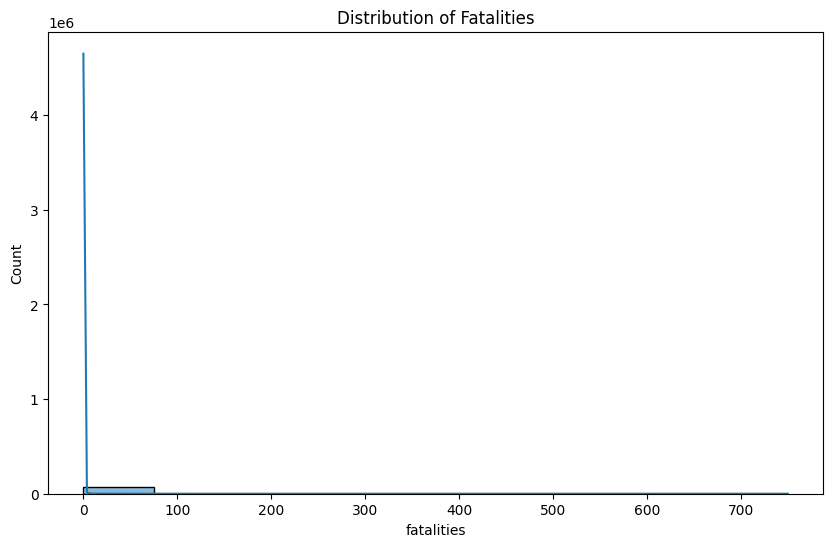

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_gpv['fatalities'], bins=10, kde=True)
plt.title('Distribution of Fatalities')
plt.show()
